# 딥러닝 모델을 만들어 보자

In [57]:
from tensorflow import keras
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

In [58]:
data = datasets.load_iris()

In [59]:
df = pd.DataFrame(data.data, columns = data.feature_names)

In [60]:
df["species"] = data.target # 종속변수

In [61]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### 종속변수 확인

In [62]:
df["species"].unique()

array([0, 1, 2])

In [63]:
x = df.drop("species", axis = 1) 
y = df["species"]

In [64]:
# 스케일링이 필요한지 모르겠으나 Standard 를 이용해서 독립변수를 스케일링 하자
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size = 0.2,
    stratify=y,
    random_state=666
)

ss = StandardScaler()
scaled_train = ss.fit_transform(x_train)
scaled_test = ss.transform(x_test)

In [65]:
x_train.shape

(120, 4)

In [66]:
# 모델을 만들기 전에 

# 입력층(4개의 독립변수가 있으니까)
inputs = keras.Input(shape = (4,))

# 은닉층(내마음)
dense1 = keras.layers.Dense(100, activation = "relu") 

# 출력층(3개의 종속변수의 확률값이 필요하니까)
dense2 = keras.layers.Dense(3, activation = "softmax")

In [67]:
model = keras.Sequential()
model.add(inputs)
model.add(dense1)
model.add(dense2)

In [68]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 100)                 │             500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 3)                   │             303 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 803 (3.14 KB)

 Trainable params: 803 (3.14 KB)

 Non-trainable params: 0 (0.00 B)

## 옵티마이저 적용해보자

In [69]:
# 종속변수가 범주형이므로 sparse_categorical_crossentropy
model.compile(optimizer="adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])
history = model.fit(
    scaled_train, 
    y_train, 
    epochs= 200, 
    batch_size=32,
    validation_data = (scaled_test, y_test),
)

Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.4333 - loss: 1.0465 - val_accuracy: 0.5333 - val_loss: 0.9979
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6083 - loss: 0.9750 - val_accuracy: 0.7333 - val_loss: 0.9310
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7500 - loss: 0.9056 - val_accuracy: 0.7667 - val_loss: 0.8724
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.7833 - loss: 0.8464 - val_accuracy: 0.8000 - val_loss: 0.8188
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8083 - loss: 0.7906 - val_accuracy: 0.8000 - val_loss: 0.7703
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8167 - loss: 0.7413 - val_accuracy: 0.8000 - val_loss: 0.7264
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8333 - loss: 0.6980 - val_accuracy: 0.8000 - val_loss: 0.6868
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8417 - loss: 0.6575 - val_accuracy: 0.8000 - val_loss:

In [70]:
# 평가도 함 해보고~
model.evaluate(scaled_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9333 - loss: 0.1008


[0.10080280154943466, 0.9333333373069763]

In [71]:
model.predict(scaled_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


array([[3.50385468e-04, 5.10688901e-01, 4.88960683e-01],
       [9.99659061e-01, 3.40855564e-04, 1.51304803e-07],
       [2.64737287e-06, 3.32218525e-03, 9.96675253e-01],
       [2.38572666e-03, 9.92642343e-01, 4.97198524e-03],
       [1.42656646e-07, 1.22026584e-04, 9.99877810e-01],
       [9.99592006e-01, 4.07585176e-04, 4.99496423e-07],
       [1.61966879e-03, 9.97431934e-01, 9.48422239e-04],
       [5.92905781e-06, 9.78413620e-04, 9.99015570e-01],
       [9.98060882e-01, 1.93841674e-03, 7.64929553e-07],
       [9.99223232e-01, 7.76250788e-04, 4.17802880e-07],
       [2.45931769e-05, 1.59919411e-02, 9.83983397e-01],
       [6.24110922e-04, 3.09145600e-01, 6.90230250e-01],
       [1.19910226e-03, 9.88631308e-01, 1.01696244e-02],
       [4.16033481e-06, 6.70393871e-04, 9.99325514e-01],
       [3.82817211e-03, 9.92428839e-01, 3.74301081e-03],
       [9.99859095e-01, 1.40765973e-04, 1.01499289e-07],
       [9.98716712e-01, 1.28300884e-03, 4.01740493e-07],
       [2.78239837e-03, 9.93902

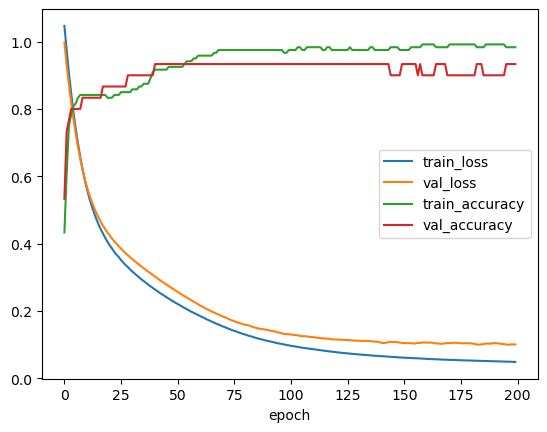

In [78]:
plt.figure()

plt.plot(history.history["loss"], label = "train_loss")
plt.plot(history.history["val_loss"], label = "val_loss")

plt.plot(history.history["accuracy"], label = "train_accuracy")
plt.plot(history.history["val_accuracy"], label = "val_accuracy")

plt.legend()
plt.xlabel("epoch")
plt.show()

## 저장해보자구용

In [73]:
model.save_weights("./model/feta_model.weights.h5") # 파라미터만
model.save("./model/feta_model-whole.keras") # 모델과 파라미터 전체

## 실제 얼마나 맞췄을까?

In [74]:
predict_values = np.argmax(model.predict(scaled_test), axis = -1) # 행짜부

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [75]:
print("예측값", predict_values)
print("정답값", y_test.values)

예측값 [1 0 2 1 2 0 1 2 0 0 2 2 1 2 1 0 0 1 2 0 2 0 2 1 0 2 1 1 1 0]
정답값 [1 0 2 1 2 0 1 2 0 0 2 1 1 2 1 0 0 1 2 0 2 0 2 2 0 2 1 1 1 0]


### 와 거의 맞추네...

In [76]:
# 정확도 계산
np.mean(predict_values == y_test.values)

np.float64(0.9333333333333333)

## 종속변수를 원핫인코딩해서 쓸수있다. => 정석방법

- 종속변수가 3개의 숫자로 표현되는게 정석

# ver2

- to_categorical()

In [79]:
enc_y_sub = keras.utils.to_categorical(y_train)

In [80]:
enc_y_sub[:5]

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [81]:
y_train[:5]

82     1
70     1
114    2
89     1
137    2
Name: species, dtype: int64

In [82]:
enc_y_val = keras.utils.to_categorical(y_train)
enc_y_test = keras.utils.to_categorical(y_test)

In [88]:
model2 = keras.Sequential()
model2.add(inputs)
model2.add(dense1)
model2.add(dense2)

# 종속변수가 범주형이므로 categorical_crossentropy
model2.compile(optimizer="adam", loss = "categorical_crossentropy", metrics = ["accuracy"])
history2 = model2.fit(
    scaled_train, 
    enc_y_val, 
    epochs= 100, 
    batch_size=8,
    validation_data = (scaled_test, enc_y_test),
)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9917 - loss: 0.0302 - val_accuracy: 0.9000 - val_loss: 0.3508
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9917 - loss: 0.0255 - val_accuracy: 0.9000 - val_loss: 0.3211
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9917 - loss: 0.0237 - val_accuracy: 0.9000 - val_loss: 0.3222
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9917 - loss: 0.0230 - val_accuracy: 0.9000 - val_loss: 0.3210
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9917 - loss: 0.0242 - val_accuracy: 0.9000 - val_loss: 0.3330
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9917 - loss: 0.0229 - val_accuracy: 0.9000 - val_loss: 0.3267
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9917 - loss: 0.0230 - val_accuracy: 0.9000 - val_loss: 0.3273
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9917 - loss: 0.0225 - val_accuracy: 0.9000 - 

In [89]:
model2.evaluate(x_test, enc_y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.3333 - loss: 27.7936


[27.79358673095703, 0.3333333432674408]